In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/iris.data")

In [4]:
data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
column=["spetal_length_cm","spetal_width_cm","petal_length_cm","petal_width_cm","class"]

In [15]:
data.columns=column

In [16]:
data.head()

,spetal_length_cm,spetal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [19]:
print(data.shape)
print(data.size)

(149, 5)
745


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   spetal_length_cm  149 non-null    float64
 1   spetal_width_cm   149 non-null    float64
 2   petal_length_cm   149 non-null    float64
 3   petal_width_cm    149 non-null    float64
 4   class             149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [26]:
print(data["class"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [27]:
data["class"]=data["class"].astype('category')

In [28]:
data.dtypes

spetal_length_cm     float64
spetal_width_cm      float64
petal_length_cm      float64
petal_width_cm       float64
class               category
dtype: object

In [30]:
data.describe()

,spetal_length_cm,spetal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


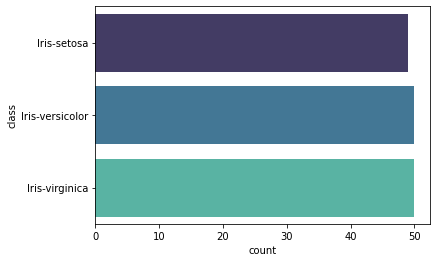

In [39]:
sns.countplot(y='class',data=data,palette="mako")

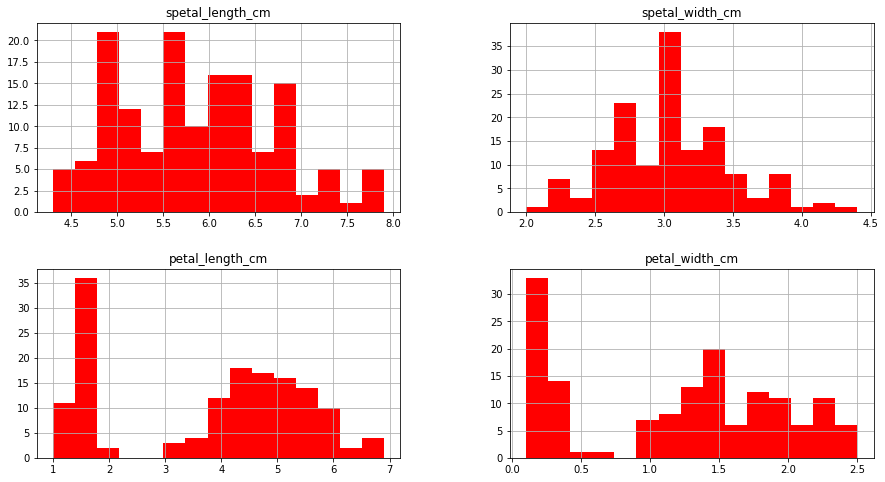

In [65]:
data.hist(figsize=(15,8),bins=15,color="red")
plt.show()

In [67]:
data.corr()

,spetal_length_cm,spetal_width_cm,petal_length_cm,petal_width_cm
spetal_length_cm,1.000000,-0.103784,0.871283,0.816971
spetal_width_cm,-0.103784,1.000000,-0.415218,-0.350733
petal_length_cm,0.871283,-0.415218,1.000000,0.962314
petal_width_cm,0.816971,-0.350733,0.962314,1.000000


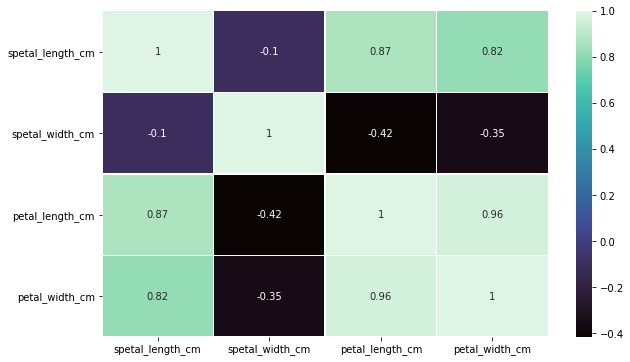

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap="mako",annot=True,linewidths="0.4")
plt.show()

In [73]:
x=data.drop('class',axis=1)
y=data['class']

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=0,test_size=0.33)

## **Model building**

In [77]:
knn_model = KNeighborsClassifier()
log_model = LogisticRegression()
knn_model.fit(x_train,y_train)
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Prediction and Performance Matrix**

In [78]:
knn_predit=knn_model.predict(x_test)
log_predit=log_model.predict(x_test)

#### **1. Accuracy**

In [80]:
print("KNN accuracy: ",{accuracy_score(y_test,knn_predit)},
      "LogisticRegression accuracy:",{accuracy_score(y_test,log_predit)}
      )


KNN accuracy: 1.0,
LogisticRegression accuracy: 1.0



#### **2. Confusion Matrix**

In [100]:
print(f"""
KNN Confusion Matrix : 
{confusion_matrix(y_test,knn_predit)}

LogisticRegression Confusion Matrix :
{confusion_matrix(y_test,log_predit)}
""")


KNN Confusion Matrix : 
[[16  0  0]
 [ 0 17  0]
 [ 0  0 17]]

LogisticRegression Confusion Matrix :
[[16  0  0]
 [ 0 17  0]
 [ 0  0 17]]



#### **3. Classification Report**

In [99]:
print(f"""
KNN Classification report:
{classification_report(y_test,knn_predit)}

LogisticRegression Classification Report:
{classification_report(y_test,log_predit)}
""")


KNN Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50


LogisticRegression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50




### **Both CNN and LgisticRegression are working in the same manner** 